# Kagel Playing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf

import sklearn.metrics as metrics 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


import missingno as msno
import warnings
warnings.filterwarnings("ignore")

## import statsmodels.ols as ols
## from pandas_profiling import ProfileReport

In [2]:
# def rmsle(y, y_pred):
  #  assert len(y) == len(y_pred)
  #  terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
  #  return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [3]:
def regressionMetrics(y, yhat):
    res = {#'MSE': metrics.mean_squared_error(y,yhat),
           #'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           #'MAE': metrics.mean_absolute_error(y,yhat),
           #'MSLE': metrics.mean_squared_log_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res


In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## Data

In [5]:
test.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167
1,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665
2,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671
3,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700
4,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987


In [6]:
train.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          365 non-null    int64  
 1   season      365 non-null    int64  
 2   mnth        365 non-null    int64  
 3   holiday     365 non-null    int64  
 4   weekday     365 non-null    int64  
 5   workingday  365 non-null    int64  
 6   weathersit  365 non-null    int64  
 7   temp        365 non-null    float64
 8   atemp       365 non-null    float64
 9   hum         365 non-null    float64
 10  windspeed   365 non-null    float64
 11  cnt         365 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 34.3 KB


<AxesSubplot:xlabel='cnt', ylabel='Density'>

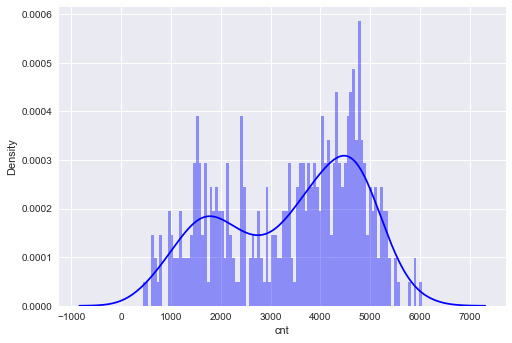

In [8]:
sns.distplot(a=train.cnt, color='b', bins=100, hist_kws={'alpha': 0.4})

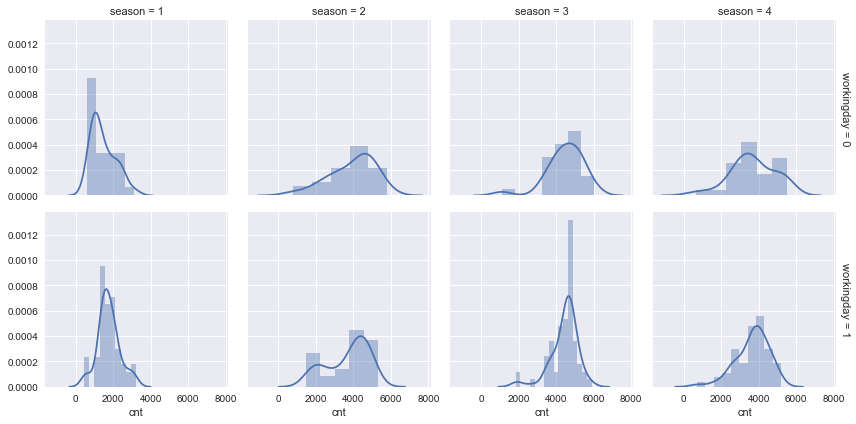

In [9]:
g = sns.FacetGrid(train, row="workingday", col="season", margin_titles=True)
g.map(sns.distplot,'cnt')

In [10]:
train_num = train[['temp','atemp','hum','windspeed']]
train_cat = train[['season','mnth', 'holiday','weekday','workingday','weathersit']]

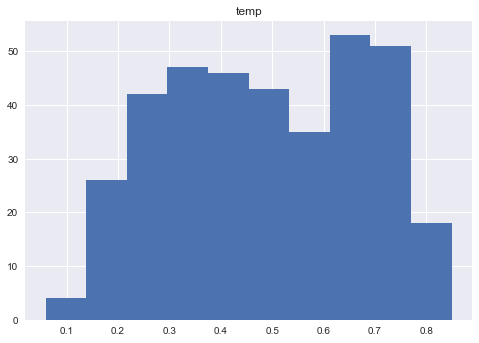

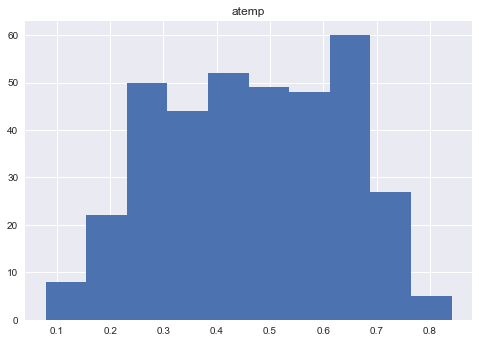

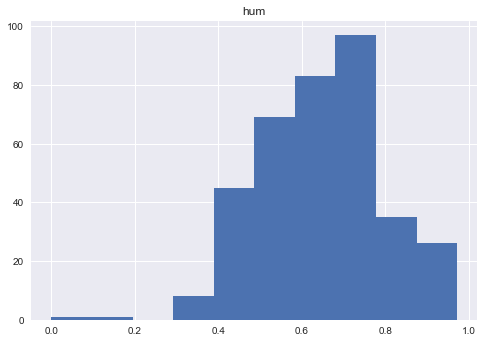

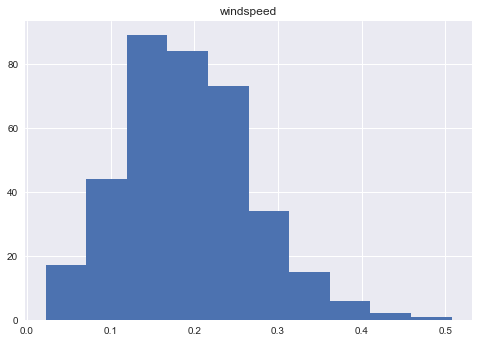

In [11]:
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

In [12]:
var_correlations = pd.DataFrame(columns=['var1','var2','Spearman correlation','p-value'])

for i in train.columns:
        for j in train.columns:
            b = "{}/{}".format(i,j)
            c = "{}/{}".format(j,i)
            if i != j:
                if (c not in var_correlations.index):
                    mask = ~np.isnan(train[i]) & ~np.isnan(train[j]) 
                    a = stats.spearmanr(train[i][mask], train[j][mask])
                    var_correlations.loc[b] = [i,j,abs(a[0]),a[1]]
        
var_correlations_filtered = var_correlations.loc[(var_correlations['Spearman correlation'] > 0.7) & (var_correlations['p-value'] < 0.05)]
var_correlations_filtered = var_correlations_filtered.sort_values(by=['Spearman correlation'], ascending=False)
var_correlations_filtered

,var1,var2,Spearman correlation,p-value
temp/atemp,temp,atemp,0.997956,0.000000e+00
id/mnth,id,mnth,0.996517,0.000000e+00
season/mnth,season,mnth,0.831141,1.517621e-94
id/season,id,season,0.827496,5.120584e-93
atemp/cnt,atemp,cnt,0.767151,5.497510e-72
temp/cnt,temp,cnt,0.762291,1.425926e-70


               temp     atemp       hum  windspeed
temp       1.000000  0.996458  0.145776  -0.114200
atemp      0.996458  1.000000  0.155812  -0.136544
hum        0.145776  0.155812  1.000000  -0.215718
windspeed -0.114200 -0.136544 -0.215718   1.000000


<AxesSubplot:>

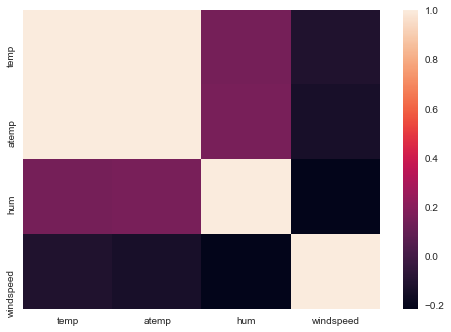

In [13]:
print(train_num.corr())
sns.heatmap(train_num.corr())

In [14]:
pd.pivot_table(train, index = 'cnt', values = ['temp','hum','windspeed'])

,hum,temp,windspeed
cnt,,,
431,0.687500,0.195000,0.113837
506,0.862500,0.217500,0.293850
605,0.948261,0.376522,0.343287
623,0.000000,0.389091,0.261877
627,0.882500,0.254167,0.351371
...,...,...,...
5538,0.591250,0.663333,0.182833
5805,0.626667,0.602500,0.120650
5895,0.455417,0.640833,0.146763


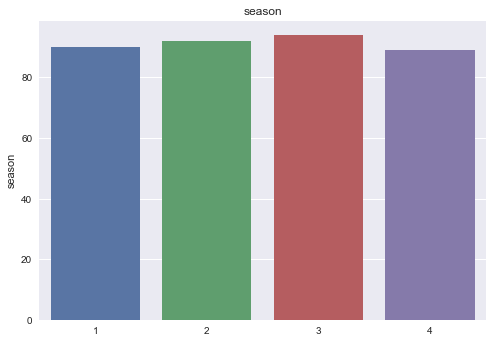

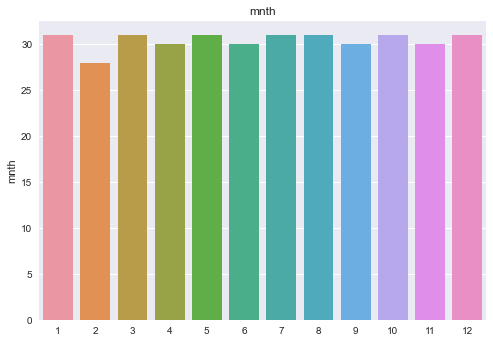

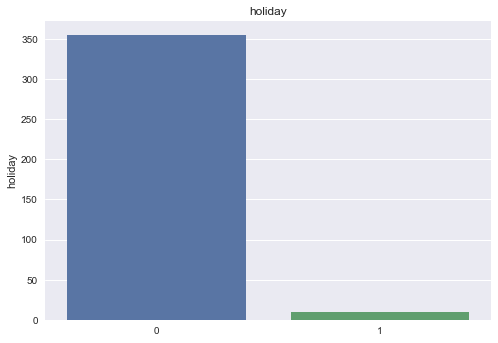

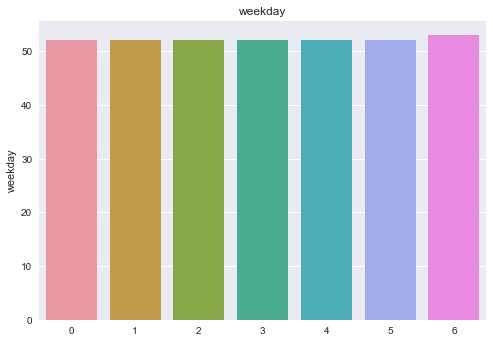

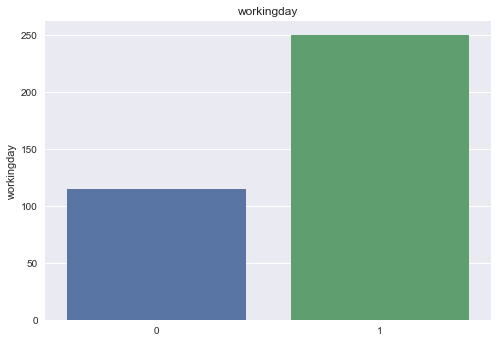

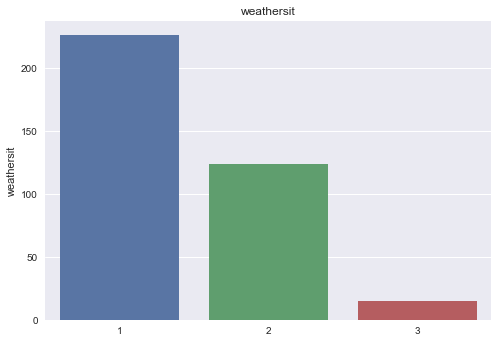

In [15]:
for i in train_cat.columns:
    sns.barplot(train_cat[i].value_counts().index,train_cat[i].value_counts()).set_title(i)
    plt.show()

In [16]:
train['avg_season_temp'] = np.nan
train['avg_season_temp'] = train['avg_season_temp'].fillna(train.groupby('season')['temp'].transform('mean'))
train['avg_season_temp'].value_counts()
train.groupby('season')['temp'].mean()

season
1    0.273528
2    0.534253
3    0.701174
4    0.426444
Name: temp, dtype: float64

In [17]:
train['avg_season_temp'].fillna(train.groupby('season')['temp'].transform('mean'))

0      0.273528
1      0.273528
2      0.273528
3      0.273528
4      0.273528
         ...   
360    0.273528
361    0.273528
362    0.273528
363    0.273528
364    0.273528
Name: avg_season_temp, Length: 365, dtype: float64

In [18]:
test['avg_season_temp'] = np.nan
test['avg_season_temp'] = test['avg_season_temp'].fillna(test.groupby('season')['temp'].transform('mean'))
test['avg_season_temp'].value_counts()
test.groupby('season')['temp'].mean()

season
1    0.321700
2    0.554557
3    0.711445
4    0.419368
Name: temp, dtype: float64

In [19]:
test['avg_season_temp'].fillna(test.groupby('season')['temp'].transform('mean'))

0      0.3217
1      0.3217
2      0.3217
3      0.3217
4      0.3217
        ...  
361    0.3217
362    0.3217
363    0.3217
364    0.3217
365    0.3217
Name: avg_season_temp, Length: 366, dtype: float64

In [20]:
train['avg_season_hum'] = np.nan
train['avg_season_hum'] = train['avg_season_hum'].fillna(train.groupby('season')['hum'].transform('mean'))
train['avg_season_hum'].value_counts()
train.groupby('season')['hum'].mean()

season
1    0.577821
2    0.658220
3    0.644677
4    0.694133
Name: hum, dtype: float64

In [21]:
train['avg_season_hum'].fillna(train.groupby('season')['hum'].transform('mean'))

0      0.577821
1      0.577821
2      0.577821
3      0.577821
4      0.577821
         ...   
360    0.577821
361    0.577821
362    0.577821
363    0.577821
364    0.577821
Name: avg_season_hum, Length: 365, dtype: float64

In [22]:
test['avg_season_hum'] = np.nan
test['avg_season_hum'] = test['avg_season_hum'].fillna(test.groupby('season')['hum'].transform('mean'))
test['avg_season_hum'].value_counts()
test.groupby('season')['hum'].mean()

season
1    0.587929
2    0.595677
3    0.622287
4    0.643305
Name: hum, dtype: float64

In [23]:
test['avg_season_hum'].fillna(test.groupby('season')['hum'].transform('mean'))

0      0.587929
1      0.587929
2      0.587929
3      0.587929
4      0.587929
         ...   
361    0.587929
362    0.587929
363    0.587929
364    0.587929
365    0.587929
Name: avg_season_hum, Length: 366, dtype: float64

In [24]:
train['avg_mnth_temp'] = np.nan
train['avg_mnth_temp'] = train['avg_mnth_temp'].fillna(train.groupby('mnth')['temp'].transform('mean'))
train['avg_mnth_temp'].value_counts()
train.groupby('mnth')['temp'].mean()

mnth
1     0.197707
2     0.282540
3     0.331667
4     0.471188
5     0.577231
6     0.693083
7     0.758575
8     0.705362
9     0.612887
10    0.469976
11    0.402338
12    0.325182
Name: temp, dtype: float64

In [25]:
train['avg_mnth_temp'].fillna(train.groupby('mnth')['temp'].transform('mean'))

0      0.197707
1      0.197707
2      0.197707
3      0.197707
4      0.197707
         ...   
360    0.325182
361    0.325182
362    0.325182
363    0.325182
364    0.325182
Name: avg_mnth_temp, Length: 365, dtype: float64

In [26]:
test['avg_mnth_temp'] = np.nan
test['avg_mnth_temp'] = test['avg_mnth_temp'].fillna(test.groupby('mnth')['temp'].transform('mean'))
test['avg_mnth_temp'].value_counts()
test.groupby('mnth')['temp'].mean()

mnth
1     0.275181
2     0.315337
3     0.449411
4     0.468809
5     0.612366
6     0.675111
7     0.752366
8     0.711801
9     0.620083
10    0.500049
11    0.336101
12    0.322880
Name: temp, dtype: float64

In [27]:
test['avg_mnth_temp'].fillna(test.groupby('mnth')['temp'].transform('mean'))

0      0.275181
1      0.275181
2      0.275181
3      0.275181
4      0.275181
         ...   
361    0.322880
362    0.322880
363    0.322880
364    0.322880
365    0.322880
Name: avg_mnth_temp, Length: 366, dtype: float64

In [28]:
train.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,avg_season_temp,avg_season_hum,avg_mnth_temp
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0.273528,0.577821,0.197707
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0.273528,0.577821,0.197707
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,0.273528,0.577821,0.197707
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,0.273528,0.577821,0.197707
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,0.273528,0.577821,0.197707


In [29]:
test.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,avg_season_temp,avg_season_hum,avg_mnth_temp
0,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,0.3217,0.587929,0.275181
1,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,0.3217,0.587929,0.275181
2,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,0.3217,0.587929,0.275181
3,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,0.3217,0.587929,0.275181
4,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,0.3217,0.587929,0.275181


                       id    season      mnth   holiday   weekday  workingday  \
id               1.000000  0.827176  0.996504  0.033929  0.011811   -0.004646   
season           0.827176  1.000000  0.831032  0.000207 -0.011705    0.007137   
mnth             0.996504  0.831032  1.000000  0.032808  0.012860   -0.004288   
holiday          0.033929  0.000207  0.032808  1.000000 -0.076087   -0.247461   
weekday          0.011811 -0.011705  0.012860 -0.076087  1.000000    0.020445   
workingday      -0.004646  0.007137 -0.004288 -0.247461  0.020445    1.000000   
weathersit       0.007012  0.035508  0.009729 -0.006442  0.047259    0.108654   
temp             0.289165  0.373380  0.288663 -0.019272 -0.039292    0.046799   
atemp            0.301958  0.382972  0.301920 -0.026448 -0.042810    0.046158   
hum              0.244867  0.249451  0.242533 -0.030896 -0.065932    0.034250   
windspeed       -0.240111 -0.242514 -0.242443  0.000734  0.061525    0.011955   
cnt              0.439829  0

<AxesSubplot:>

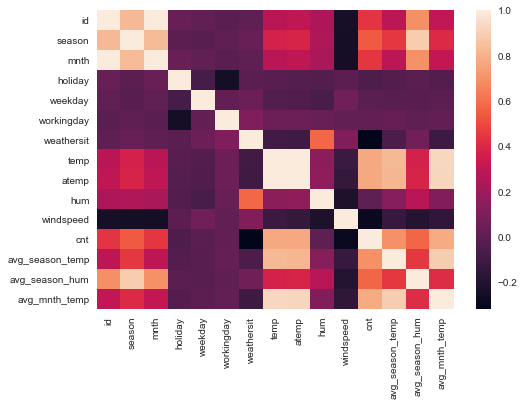

In [30]:
print(train.corr())
sns.heatmap(train.corr())

In [31]:
corr_df = pd.DataFrame(columns=('Spearman Correlation', 'p-value'))

def spearman_corr(df):
    for i in df.columns:
        if i != 'cnt':
            mask = ~np.isnan(df[i]) & ~np.isnan(df['cnt'])
            a = stats.spearmanr(df[i][mask],df['cnt'][mask])
            b = "{}".format(i)
            corr_df.loc[b] = [abs(a[0]),a[1]]
        corr_dff = corr_df.loc[(corr_df['Spearman Correlation'] > 0.1) & (corr_df['p-value'] < 0.05)]
        corr_dff = corr_df.sort_values(by=['Spearman Correlation'], ascending=False)
        return corr_dff
    
corr = spearman_corr(train)
corr

,Spearman Correlation,p-value
id,0.388885,1.260911e-14


In [32]:
train.to_csv("train_new.csv")


In [33]:
test.to_csv("test_new.csv")

In [34]:
#X_test = test.loc[:,['season','temp','weathersit','windspeed','hum','workingday']]
#X = train.loc[:,['season','temp','weathersit','windspeed','hum','workingday']]  #train.columns != 'cnt'
#y = train['cnt']

## Supervised Models

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [36]:
models_list = pd.DataFrame()

## Trying to Split the Data

In [37]:
X = train.loc[:,train.columns != 'cnt']  #train.columns != 'cnt'
y = train['cnt']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=100)

#### Gradient Boosting Machine (GBM)

In [53]:
mod = GradientBoostingRegressor(random_state=3, learning_rate=0.1,n_iter_no_change=20,ccp_alpha=2,n_estimators=100)
mod.fit(X_train,y_train)

GradientBoostingRegressor(ccp_alpha=2, n_iter_no_change=20, random_state=3)

In [54]:
pred = mod.predict(X_test)
model_dict = {'model': "GBM"}
models_list = models_list.append({**model_dict, **regressionMetrics(y_test, pred)}, ignore_index=True)
models_list

,RMSLE,model
0,0.231014,GBM
1,0.166866,GBM
2,0.231014,GBM


In [ ]:
test_pred1 = mod1.predict(X_test)

prediction = pd.DataFrame(columns={'id','cnt'})
prediction['id'] = test['id']
prediction['cnt'] = test_pred1
prediction = prediction.set_index('id')   # prediction.set_index('id', inplace=True) [another way to write]
prediction.to_csv('Linear_Regression_basic.csv')

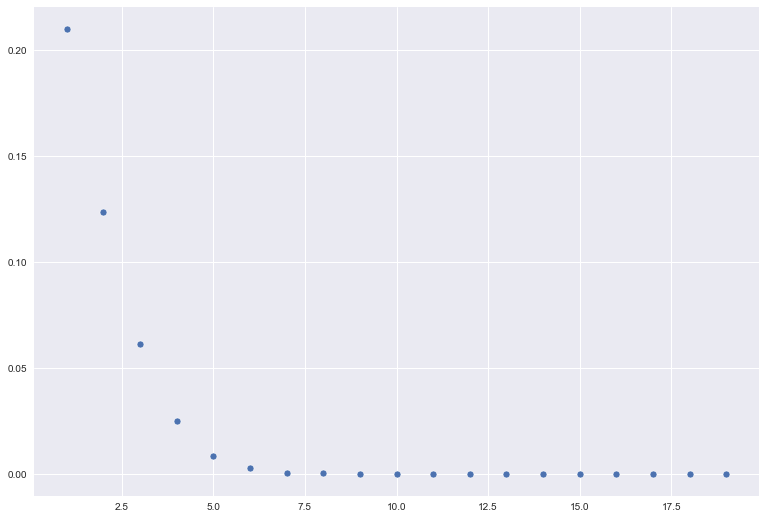

,RMSLE,max_depth
18,0.000028,19.0
17,0.000028,18.0
16,0.000028,17.0
15,0.000028,16.0
14,0.000028,15.0
13,0.000028,14.0
12,0.000028,13.0
11,0.000028,12.0
10,0.000029,11.0
9,0.000029,10.0


In [55]:
from sklearn.model_selection import train_test_split
import random
evaluate_df=pd.DataFrame()
rmsle = []
max_depth =[]
for i in range (1,20):
    mod5 = GradientBoostingRegressor(random_state=0, max_depth=i)
    mod5.fit(X_train, y_train)
    y_pred_train = mod5.predict(X_train)
    RMSLE_score = np.sqrt(metrics.mean_squared_log_error(y_train, y_pred_train))
    rmsle.append(RMSLE_score)
    max_depth.append(i)
    new_row = {'max_depth':i, 'RMSLE':RMSLE_score}
    evaluate_df = evaluate_df.append(new_row, ignore_index = True)
fig, ax = plt.subplots(figsize=(13,9))
sns.scatterplot(x=max_depth, y=rmsle, ax=ax)
plt.show()
evaluate_df.sort_values(by='RMSLE', ascending=True)

In [56]:
evaluate_df

,RMSLE,max_depth
0,0.209810,1.0
1,0.123632,2.0
2,0.061330,3.0
3,0.024600,4.0
4,0.008536,5.0
5,0.002551,6.0
6,0.000352,7.0
7,0.000087,8.0
8,0.000030,9.0
9,0.000029,10.0


In [42]:
display(evaluate_df.iloc[5]);

RMSLE        0.002551
max_depth    6.000000
Name: 5, dtype: float64

In [43]:
#df.iloc[max_depth=5].to_csv('evaluate52.csv')

In [44]:
new_mod = GradientBoostingRegressor(random_state=0, max_depth=6.0)
new_mod.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6.0, random_state=0)

In [45]:
pred_new=new_mod.predict(X)

In [46]:
model_dict = {'model': "GBM"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred_new)}, ignore_index=True)
models_list

,RMSLE,model
0,0.231014,GBM
1,0.166866,GBM


In [52]:
#sns.scatterplot(y, pred_new)

In [51]:
pro_gbm = new_mod.predict(X_test)

prediction = pd.DataFrame(columns={'id','cnt'})
prediction['id'] = test['id']
prediction['cnt'] = pro_gbm
prediction = prediction.set_index('id')   # prediction.set_index('id', inplace=True) [another way to write]
prediction.to_csv('ro_gbm.csv')

ValueError: Length of values (182) does not match length of index (366)

In [ ]:
display(evaluate_df.iloc[5]);

In [ ]:
check_df2 = check_df.sort_values(by='y_diff', ascending=False).dropna()
check_df2

In [ ]:
sns.set(font_scale = 1.1)

for i in check_df:
    sns.jointplot(x=i, y='cnt', hue='istest', data=check_df, legend=False)
    plt.legend(title='istest', loc='upper right', labels=['Yes', 'No'])

plt.show()

In [ ]:
corr_df = pd.DataFrame(columns=('Spearman Correlation', 'p-value'))

def spearman_corr(df):
    for i in df.columns:
        if i != 'y_diff':
            mask = ~np.isnan(df[i]) & ~np.isnan(df['cnt'])
            a = stats.spearmanr(df[i][mask],df['cnt'][mask])
            b = "{}".format(i)
            corr_df.loc[b] = [abs(a[0]),a[1]]
        corr_dff = corr_df.loc[(corr_df['Spearman Correlation'] > 0.1) & (corr_df['p-value'] < 0.05)]
        corr_dff = corr_df.sort_values(by=['Spearman Correlation'], ascending=False)
        return corr_dff
    
corr = spearman_corr(check_df2)
corr

## The Basic Data

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
X_test = test
X = train.loc[:,train.columns != 'cnt']  #train.columns != 'cnt'
y = train['cnt']

### Linear Regression

In [57]:
mod1 = LinearRegression()
mod1.fit(X,y)
pred1 = mod1.predict(X)

regressionMetrics(y, pred1)

{'RMSLE': 0.27497860340657143}

In [58]:
model_dict = {'model': "Linear Regression"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred1)}, ignore_index=True)
models_list

,RMSLE,model
0,0.231014,GBM
1,0.166866,GBM
2,0.231014,GBM
3,0.274979,Linear Regression


In [60]:
test_pred1 = mod1.predict(X_test)

prediction = pd.DataFrame(columns={'id','cnt'})
prediction['id'] = test['id']
prediction['cnt'] = test_pred1
prediction = prediction.set_index('id')   # prediction.set_index('id', inplace=True) [another way to write]
prediction.to_csv('Linear_Regression_basic.csv')

ValueError: Length of values (183) does not match length of index (366)

In [ ]:
sns.scatterplot(y, pred1)

### Decision Tree

In [ ]:
mod2 = DecisionTreeRegressor(random_state=100)
mod2.fit(X,y)

In [ ]:
pred2 = mod2.predict(X)
model_dict = {'model': "Decision Tree"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred2)}, ignore_index=True)
models_list

In [ ]:
test_pred2 = mod2.predict(X_test)
prediction = pd.DataFrame(columns={'id','cnt'})
prediction['id'] = test['id']
prediction['cnt'] = test_pred2
prediction = prediction.set_index('id')   # prediction.set_index('id', inplace=True) [another way to write]
prediction.to_csv('Decision_Tree_basic.csv')

In [ ]:
sns.scatterplot(y, pred2)

### Random Forest

In [ ]:
mod3 = RandomForestRegressor(random_state=1, n_estimators=700)
mod3.fit(X,y)

In [ ]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred3)}, ignore_index=True)
models_list

In [ ]:
test_pred3 = mod3.predict(X_test)

prediction = pd.DataFrame(columns={'id','cnt'})
prediction['id'] = test['id']
prediction['cnt'] = test_pred3
prediction = prediction.set_index('id')   # prediction.set_index('id', inplace=True) [another way to write]
prediction.to_csv('Random_Forest_basic.csv')

In [ ]:
sns.scatterplot(y, pred3)

### Adaptive Boosting (ADABoost)

In [ ]:
mod4 = AdaBoostRegressor(random_state=100,loss='square',base_estimator=None,n_estimators=100,learning_rate=0.6)
mod4.fit(X,y)

In [ ]:
pred4 = mod4.predict(X)
model_dict = {'model': "ADABoost"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred4)}, ignore_index=True)
models_list

In [ ]:
test_pred4 = mod4.predict(X_test)

prediction = pd.DataFrame(columns={'id','cnt'})
prediction['id'] = test['id']
prediction['cnt'] = test_pred4
prediction = prediction.set_index('id')  # prediction.set_index('id', inplace=True) [another way to write]
prediction.to_csv('ADABoost_basic_new.csv')

In [ ]:
sns.scatterplot(y, pred4)

### Gradient Boosting Machine (GBM)

In [ ]:
mod5 = GradientBoostingRegressor(random_state=3, learning_rate=0.7,n_iter_no_change=20,ccp_alpha=2,n_estimators=100)
mod5.fit(X,y)

In [ ]:
pred5 = mod5.predict(X)
model_dict = {'model': "GBM"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred5)}, ignore_index=True)
models_list

In [ ]:
test_pred5 = mod5.predict(X_test)

prediction = pd.DataFrame(columns={'id','cnt'})
prediction['id'] = test['id']
prediction['cnt'] = test_pred5
prediction = prediction.set_index('id')  # prediction.set_index('id', inplace=True) [another way to write]
prediction.to_csv('gbm_basic_new.csv')

In [ ]:
sns.scatterplot(y, pred5)

In [ ]:
from sklearn.model_selection import train_test_split
import random
evaluate_df=pd.DataFrame()
rmsle = []
max_depth =[]
for i in range (1,20):
    mod5 = GradientBoostingRegressor(random_state=0, max_depth=i)
    mod5.fit(X_train, y_train)
    y_pred_train = mod5.predict(X_train)
    RMSLE_score = np.sqrt(metrics.mean_squared_log_error(y_train, y_pred_train))
    rmsle.append(RMSLE_score)
    max_depth.append(i)
    new_row = {'max_depth':i, 'RMSLE':RMSLE_score}
    evaluate_df = evaluate_df.append(new_row, ignore_index = True)
fig, ax = plt.subplots(figsize=(13,9))
sns.scatterplot(x=max_depth, y=rmsle, ax=ax)
plt.show()
evaluate_df.sort_values(by='RMSLE', ascending=True)

In [ ]:
display(evaluate_df.iloc[5]);

### Support Vector Machine (SVM)

In [ ]:
mod6 = SVR()
mod6.fit(X,y)

In [ ]:
pred6 = mod6.predict(X)
model_dict = {'model': "SVM"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred6)}, ignore_index=True)
models_list

In [ ]:
test_pred6 = mod6.predict(X_test)

prediction = pd.DataFrame(columns={'id','cnt'})
prediction['id'] = test['id']
prediction['cnt'] = test_pred6
prediction = prediction.set_index('id')   # prediction.set_index('id', inplace=True) [another way to write]
prediction.to_csv('SVM_basic.csv')

In [ ]:
sns.scatterplot(y, pred6)

## Model Selection

In [ ]:
models_list.sort_values('RMSLE')